## Clustering: Modeling: Introduction to K-Means

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# supress scientific notation
np.set_printoptions(suppress=True)

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

### Lesson Goals:
 - #### Cement a basic understanding of how K-Means operates
 - #### Observe an initial implementation of K-Means clustering
 - #### Learn how we can determine how many clusters to fit

---

> ### So What *is* K-Means Clustering?

---

### K-Means Clustering is the first unsupervised algorithm that we will implement.
- **Remember**, when we say unsupervised in relation to machine learning, we are describing a methodology that does *not* have a labeled target.  This doesn't mean that we won't leverage our clusters for a supervised methodology, but that this type of algorithm cannot map to a specific label, only convey how things are similar based on the paremeters of whatever algorithm we use.
- K-Means is a method of clustering that uses a pre-determined number of clusters 
- K stands for the number of clusters, similar to the way it means the number of neighbors in KNN

---

> ### So How does K-Means Clustering Work?

---

Step 1:  Randomly(ish) **choose k starting centers**

Step 2: Use distance calculations to **assign every point to the cluster of whatever centroid each point is closest to**
     
Step 3: **Reposition the centroids** by calculating the mean of each dimension of the collective points that have been assigned to each cluster.

Step 4+: **Iterate.** Now that we have moved centroids, re-assign your points and repeat the process, until the centers stop moving.

---
---

### Visual examples: 

K-means visuals (Slideshow): 
https://docs.google.com/presentation/d/1NtMLd4fp2pi_bDJiIg2O-5g48xJiXjtYFad42B6Pj6Q/edit?usp=sharing

Animation (Thanks Zach!): https://stats-demos.zach.wiki/static/kmeans_clustering.mp4

---

> #### Cool, let's check out how to use this in SKLearn!

---

In [2]:
from pydataset import data

# import data

iris = data('iris')
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [3]:
# rename columns

iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species']

In [4]:
# define independent variables for k-means

X = iris[['sepal_length', 'petal_length']]
scaler = MinMaxScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])
# sklearn implementation of KMeans

#define the thing
kmeans = KMeans(n_clusters=3, random_state=321)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled)
iris['cluster'] = kmeans.predict(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)

In [5]:
# look at distribution of sepal length and petal_length

# ####

In [6]:
# Scale the X

scaler = MinMaxScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

In [7]:
# look at the head
X_scaled.head()

,sepal_length,petal_length
1,0.222222,0.067797
2,0.166667,0.067797
3,0.111111,0.050847
4,0.083333,0.084746
5,0.194444,0.067797


In [8]:
# sklearn implementation of KMeans

#define the thing
#kmeans = 

# fit the thing
####

# Use (predict using) the thing 
####

In [9]:
# make a new column names cluster in iris and X_scaled dataframe

iris['cluster'] = kmeans.predict(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)

In [10]:
# lets look at sample of 15 randomly selected rows in iris dataset

iris.sample(15)

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
49,5.3,3.7,1.5,0.2,setosa,1
93,5.8,2.6,4.0,1.2,versicolor,2
119,7.7,2.6,6.9,2.3,virginica,0
4,4.6,3.1,1.5,0.2,setosa,1
62,5.9,3.0,4.2,1.5,versicolor,2
1,5.1,3.5,1.4,0.2,setosa,1
132,7.9,3.8,6.4,2.0,virginica,0
101,6.3,3.3,6.0,2.5,virginica,0
89,5.6,3.0,4.1,1.3,versicolor,2
73,6.3,2.5,4.9,1.5,versicolor,2


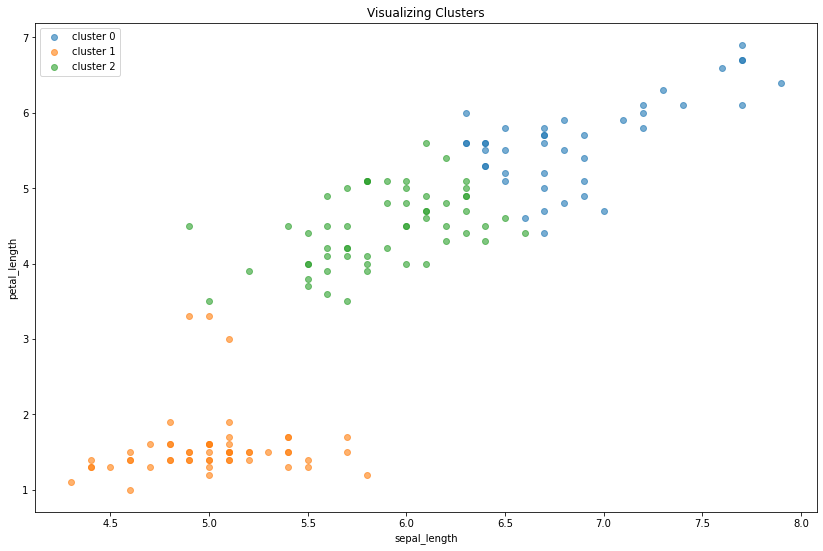

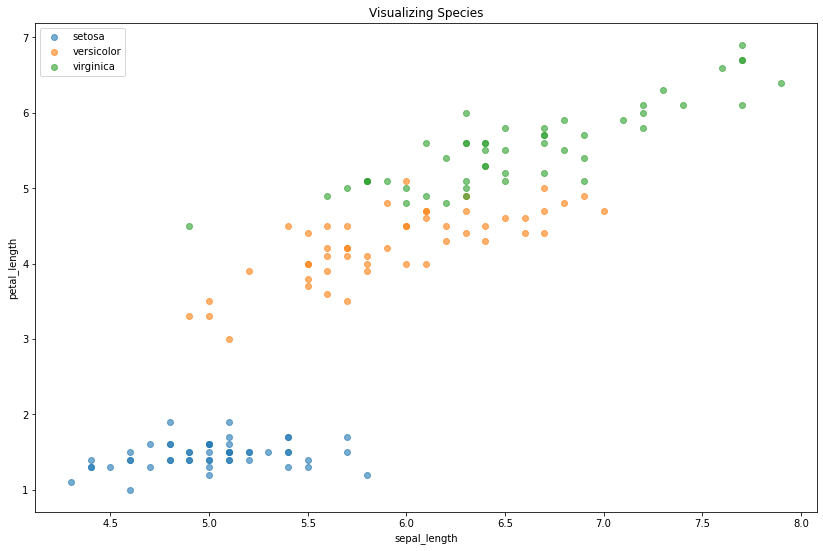

In [11]:
plt.figure(figsize=(14, 9))

for cluster, subset in iris.groupby('cluster'):
    plt.scatter(subset.sepal_length, subset.petal_length, label='cluster ' + str(cluster), alpha=.6, cmap='reds')
plt.legend()
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.title('Visualizing Clusters')
plt.show()


plt.figure(figsize=(14, 9))
for cluster, subset in iris.groupby('species'):
    plt.scatter(subset.sepal_length, subset.petal_length, label=str(cluster), alpha=.6)
# centroids.plot.scatter(y='petal_length', x='sepal_length', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.title('Visualizing Species')
plt.show()

### Attributes for Kmeans : 

- cluster_centers_: The center point of each cluster (aka centroids).

- labels_: The labels for each observation.

- inertia_: Sum of squared distances of samples to their closest cluster center.

In [12]:
# Cluster Centers aka centroids. The output is scaled!!

# kmeans.####

In [13]:
# Make a dataframe 
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids_scaled

,sepal_length,petal_length
0,0.714770,0.782968
1,0.196017,0.094979
2,0.439484,0.588983


In [14]:
# Centriods for unscaled data?
centroids = iris.groupby('cluster')['sepal_length', 'petal_length'].mean()
centroids

,sepal_length,petal_length
cluster,,
0,6.873171,5.619512
1,5.005660,1.560377
2,5.882143,4.475000


In [15]:
# Another way to get unscaled centroids?

#  ####

In [16]:
# Labels (same as from predict)

# kmeans.####

Text(0.5, 1.0, 'Visualizing Cluster Centers')

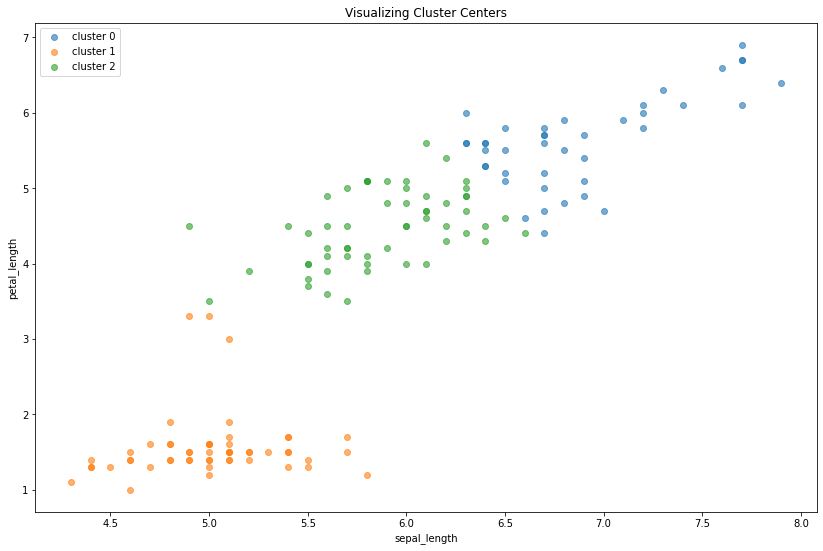

In [17]:
plt.figure(figsize=(14, 9))

for cluster, subset in iris.groupby('cluster'):
    plt.scatter(subset.sepal_length, subset.petal_length, label='cluster ' + str(cluster), alpha=.6)

# centroids.plot.scatter(y='petal_length', x='sepal_length', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.title('Visualizing Cluster Centers')

---
> ## Mini Exercise:

> #### What if we chose a different number of clusters?

> Take ten minutes to look through the documentation for K-Means Clustering on Sci-Kit Learn.

> Change the number k of clusters, and then one other hyperparameter. Record your takeaways.
---

---

> #### How do we determine which K to use?

---

## How to choose 'k'

#### The human element: Domain knowledge, intuition and prior knowledge
 - Do you have an understanding for how many markets might exist?
 - Do you have knowledge of some grouping that isnt referenced in your existing features?
 - Did you observe specific observable clusters in your exploratory data analysis?

#### The computational element: Elbow Method
 - Try different k values and evaluate results
 - Inertia is a term that describes the sum of squared distances from each point to it's assigned centroid  
 - Inertia asymptotically approaches zero as we increase k.
 - We can observe a point where the interia begins to reduce less significantly, "the elbow"

In [19]:
# We can observe interia as a baked in property of our kmeans object
#kmeans.####

In [20]:
X = iris[['petal_length', 'sepal_length']]
from sklearn.preprocessing import StandardScaler
scaler = MinMaxScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

k =2 

kmeans = KMeans(n_clusters= k)
kmeans.fit(X_scaled)
kmeans.inertia_

5.3260673221799

In [21]:
# intertia with k = 3
k =3

kmeans = KMeans(n_clusters= k)
kmeans.fit(X_scaled)
kmeans.inertia_

2.7292451122979946

In [22]:
# interia with k = 4

k =4

kmeans = KMeans(n_clusters= k)
kmeans.fit(X_scaled)
kmeans.inertia_

1.78773127723591

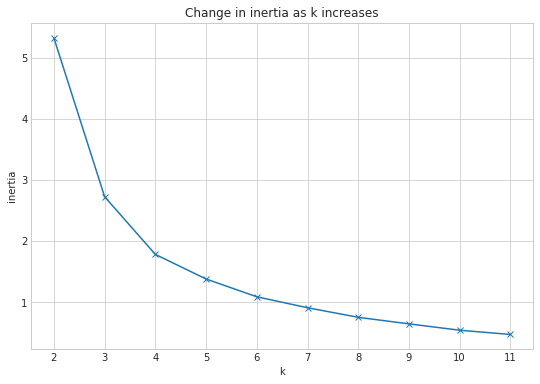

In [23]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

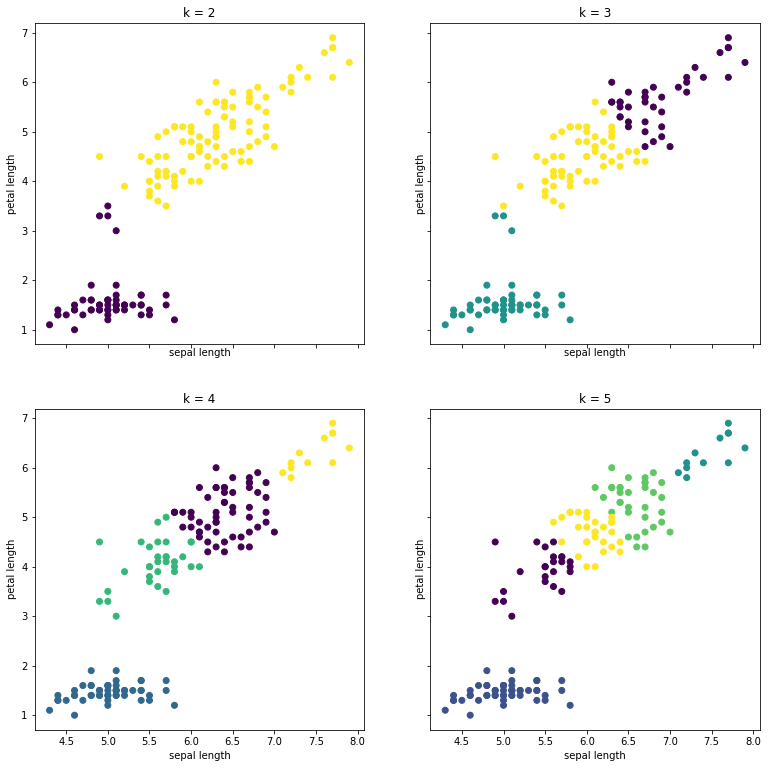

In [24]:
# What value of k is appropriate?


fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X_scaled).predict(X_scaled)
    ax.scatter(X.sepal_length, X.petal_length, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='sepal length', ylabel='petal length')